# Importing all the required libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
xgbr=XGBRegressor()

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv('baseball_case_study.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


from the above data frame we observe that there are 30 columns and 17 rows

where 'W' is our target variable

Changing the order of our target column to the last position

In [3]:
new_df=df.pop('W')

In [4]:
df_new=df.insert(16,'W',new_df)

In [5]:
df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [6]:
columns=df.columns
columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

our target variable has continuous values therfore we get to know that it is a regression problem

In [7]:
df.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74


# Checking NULL values in our DataFrame

In [8]:
df.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
W      0
dtype: int64

there our no NULL values present in our DataSet

#    DataFrame Description

In [9]:
df.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


The difference between the 3 quartiles ,25%,50%,75%,and the max value can give us an idea about the ouliers.

As the difference is not very vast we can say that not many outliers are present

# Checking The data-type of our columns

In [10]:
df.dtypes

R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
W        int64
dtype: object

We can see that all columns are of int data type and one column is of float data, therefore there is no need for any data conversion

 checking unique values

In [11]:
df.nunique()

R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
W      24
dtype: int64

we can see that there are a lot of unique numbers

# EDA

# Visualization

lmplot

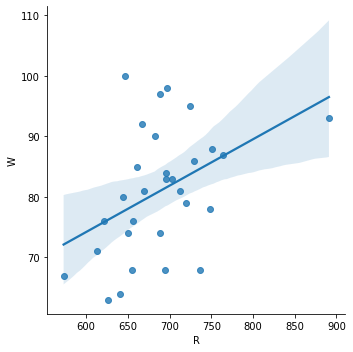

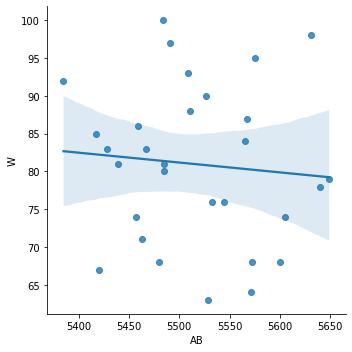

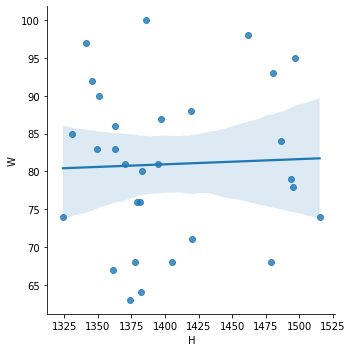

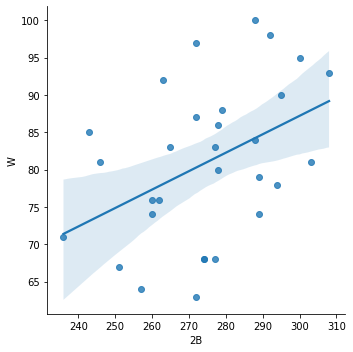

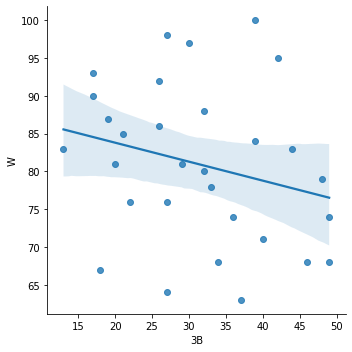

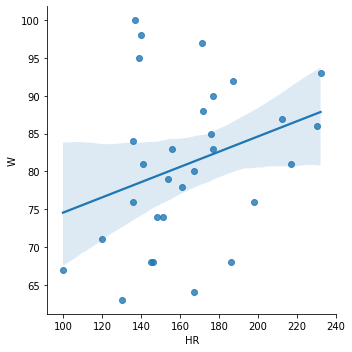

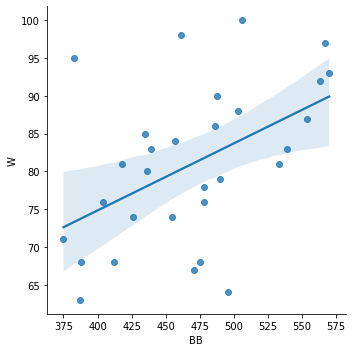

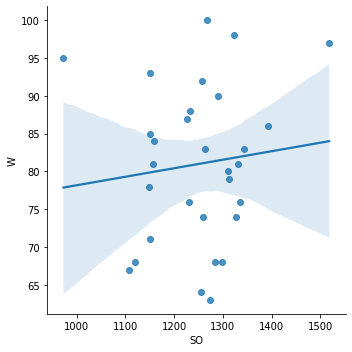

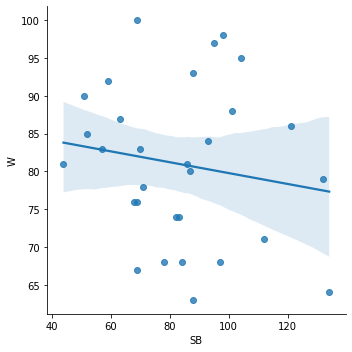

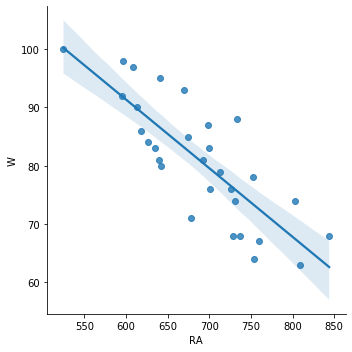

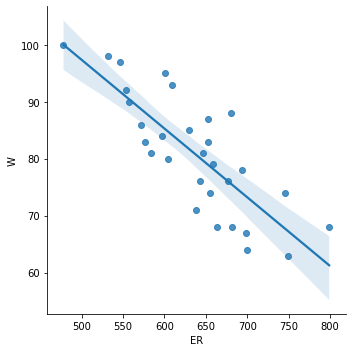

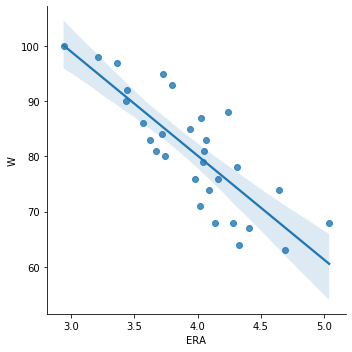

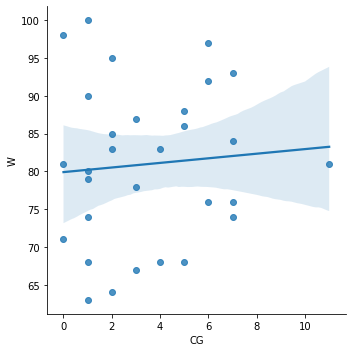

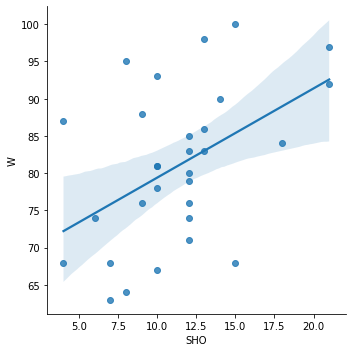

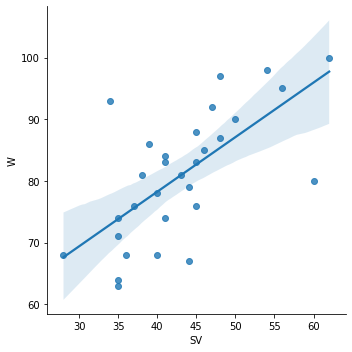

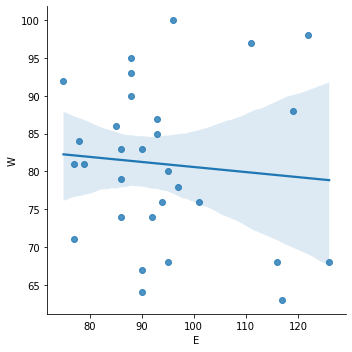

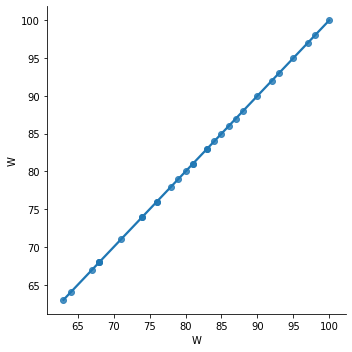

In [12]:
for i in df:
    sns.lmplot(x = i , y ='W' , data = df)

From the graphs plotted above we can make the following obseravtions

1)W vs R graph-as the runs increase the number of wins also increase , therefore we can say wins is directly proportionla to Runs

2)W vs Ab graph-we can observe a slight decrease in At bats as W increases , therefore we can say that it is inversely proportional

3)W vs H graph-we can observe that the Hits doesn't make much difference on the wins

4)W vs 2B graph-we observe that as doubles increase the wins also increase, therefore we can say that doubles is directly proportional to Wins

5)W vs 3B graph-we can observe that the wins decrease when triples increases , there they are inversely proportional

6)W vs HR graph-we observe that HR is directly proportional to Wins

7)W vs BB graph-we observe that BB is directly proportional to Wins

8)W vs SO graph-we observe that SO is directly proportional to Wins, but not much

9)W vs SB graph-we observe that SB is inversly proportional to Wins

10)W vs RA graph-we observe that RA is inversly proportional to Wins

11)W vs ER graph-we observe that ER is inversely proportional to Wins

12)W vs EAR graph-we observe that ERA is inversely propotional to Wins

13)W vs CG graph-we observe that CG is directly proportional to Wins, but it affects slightly

14)W vs SHO graph-we observe that SHO is directly porportional to Wins

15)W vs SV graph-we observe that SV is directly proportional to Wins

16)W vs E graph-we observe that E is inversely proportional , but not much

Barplot

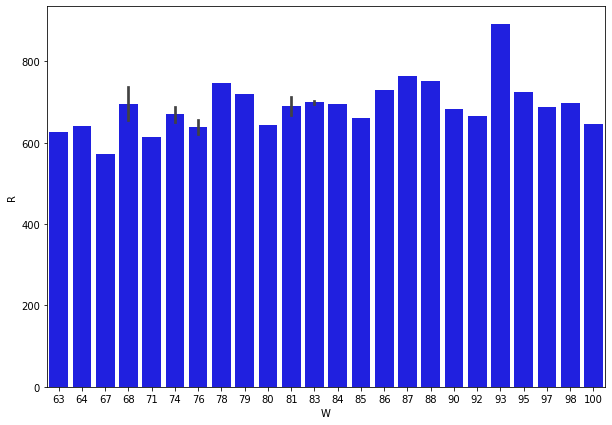

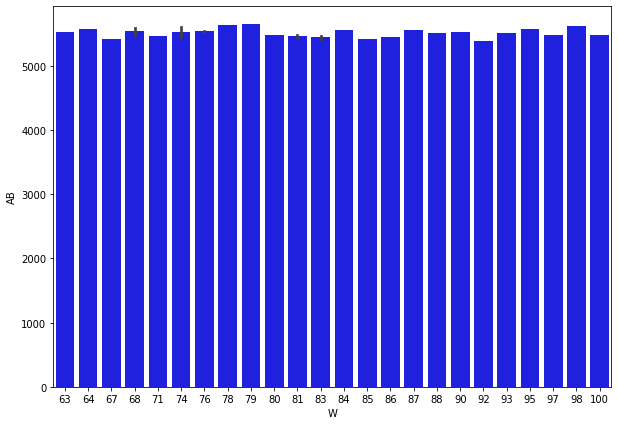

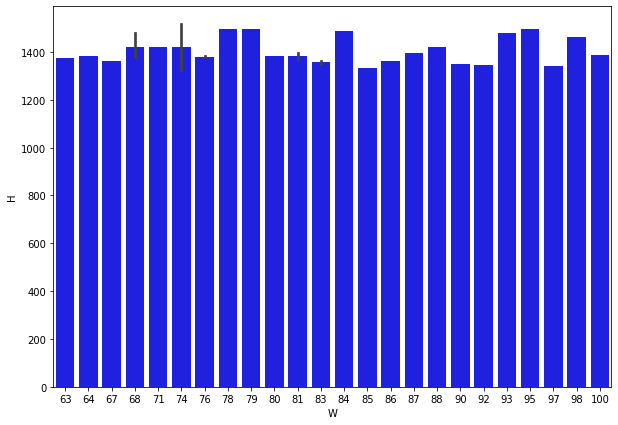

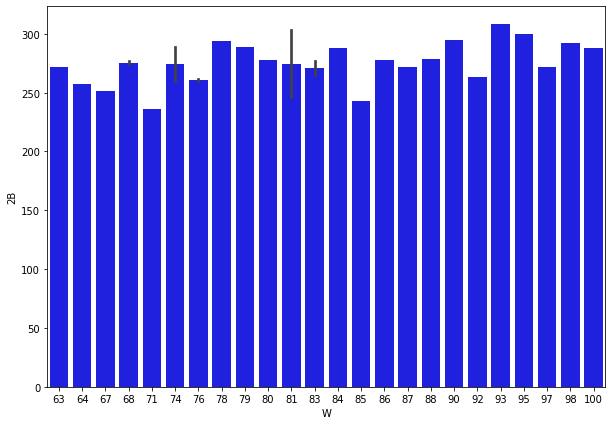

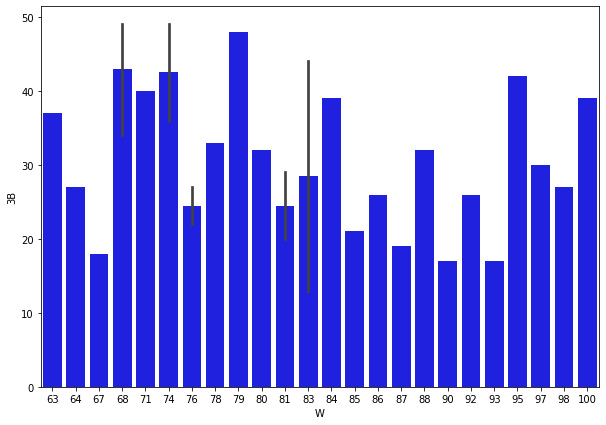

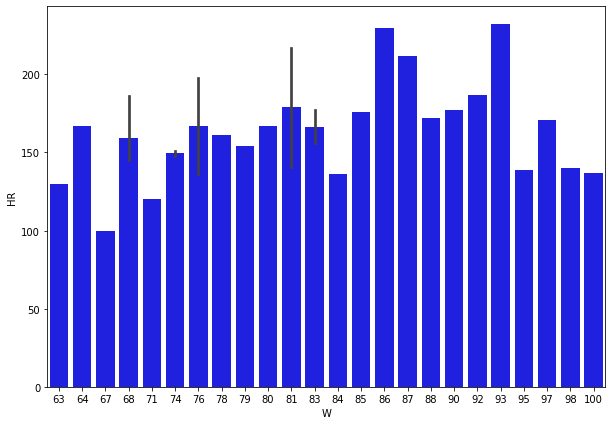

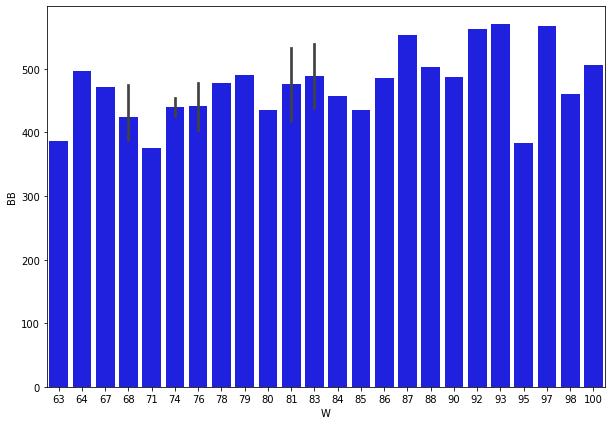

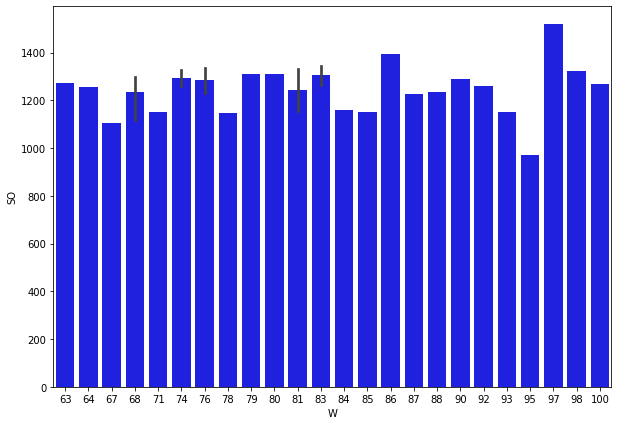

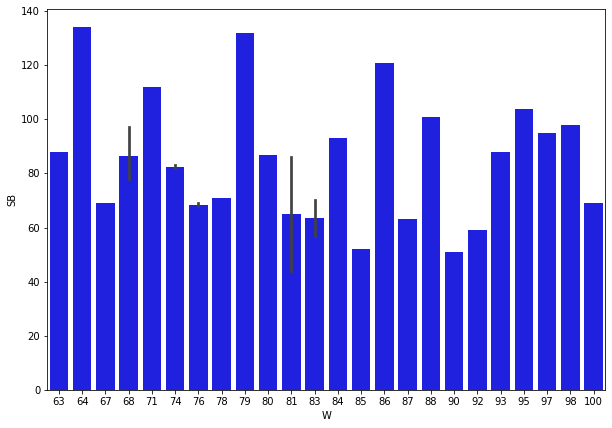

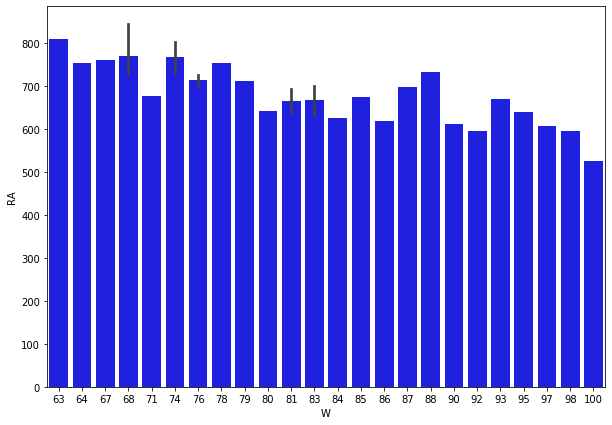

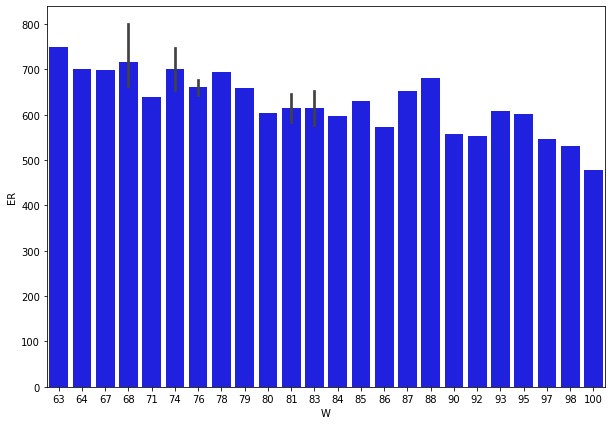

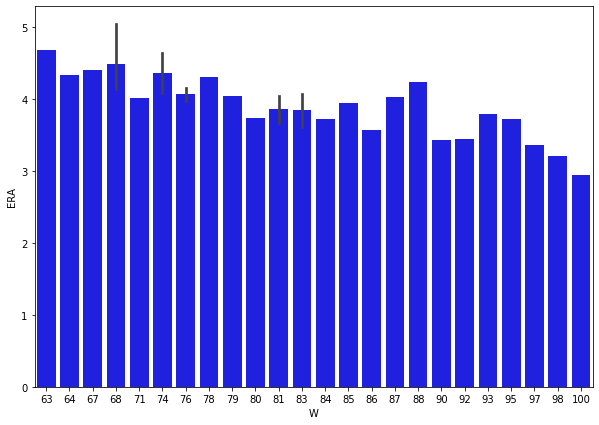

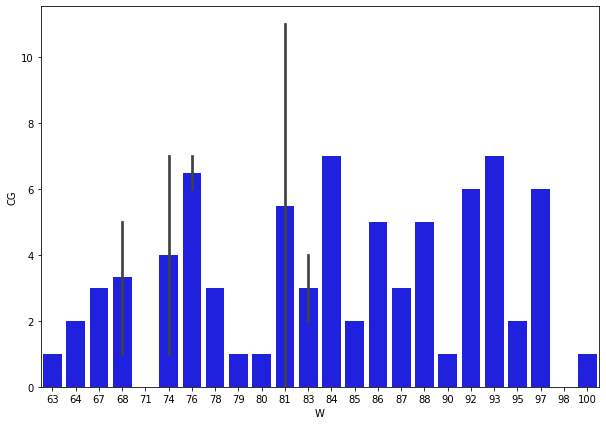

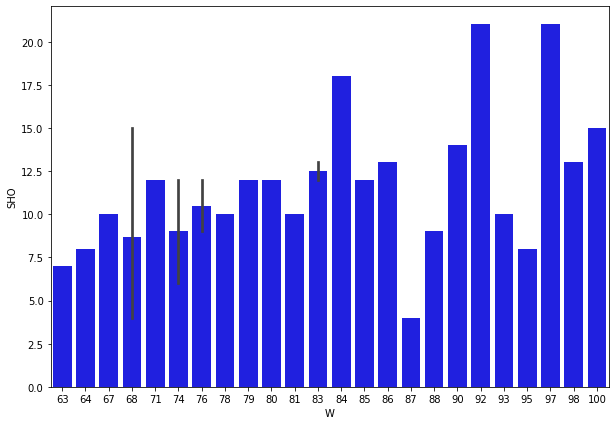

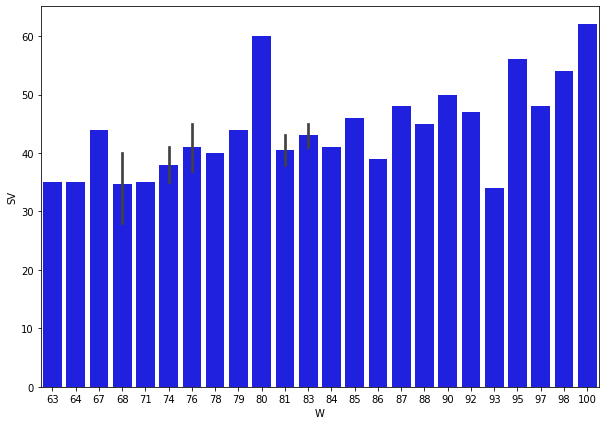

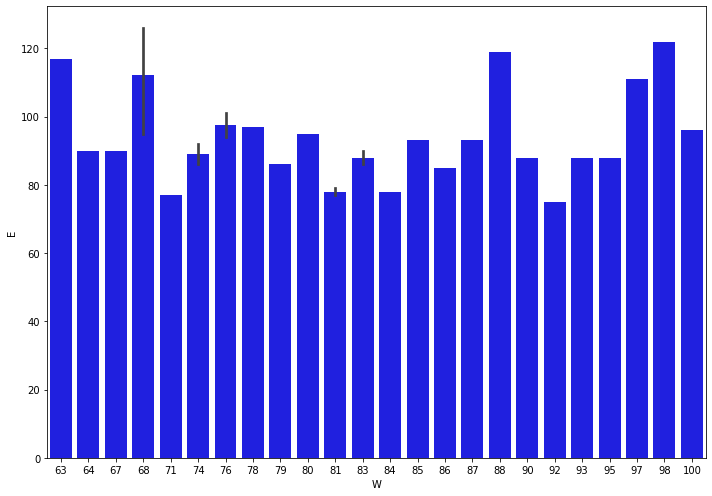

In [13]:
index=0
labels = df['W']
features = df.drop('W', axis=1)

for col in features.items():
    plt.figure(figsize=(10,7))
    sns.barplot(x=labels, y=col[index], data=df, color="blue")
plt.tight_layout()
plt.show()

from the above barplots we can identify the trend or a pattern:

 1)The Runs(R) vs Wins(W) graph has an increasing trend
 
 2)The At Bats(AB) vs Wins(W) graph has no pattern at all and it is uniform
 
 3)The Hits(H) vs Wins(W) graph has no pattern and is almost unifrom
 
 4)The Doubles(2B) vs Wins(W) graph has no pattern and is almost unifrom
 
 5)The Triples(3B) vs Wins(W) graph has no pattern and is not unifrom
 
 6)The HomeRuns(HR) vs Wins(W) graph has no pattern
 
 7)The BB vs Wins(W) graph has no pattern
 
 8)The StrikeOut(SO) vs Wins(W) graph has no pattern and is almost uniform
 
 9)The Stolen Bases(SB) vs Wins(W) graph has no pattern and is not uniform
 
 10)The RunAllowed(RA) vs Wins(W) has a decreasing trend
 
 11)The EarnedRuns(ER) vs Wins(W) has a decreasing trend
 
 12)The Earned RunsAverage(ERA) vs Wins(W) has a decreasing trend
 
 13)The CompleteGames(CG) vs Wins(W) has no pattern
 
 14)The ShutOuts(SHO) vs Wins(W) has and increasing trend
 
 15)The Saves(SV) vs Wins(W) have an increasing trend
 
 16)The Error(E) vs Wins(W) have no pattern

Thus we can conclude that coclude that the Runs,ShutOuts and saves play a major role in predicitng the Wins

LinePlot

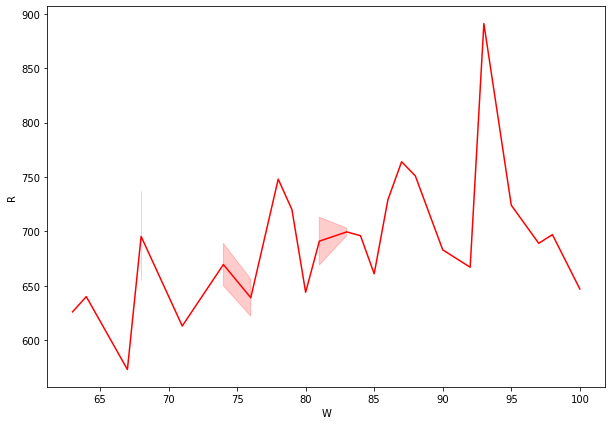

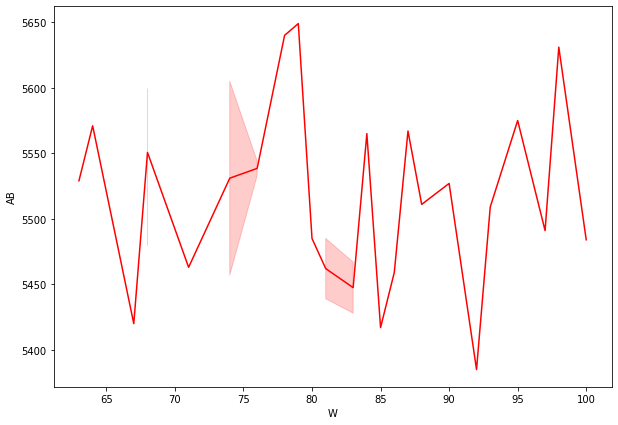

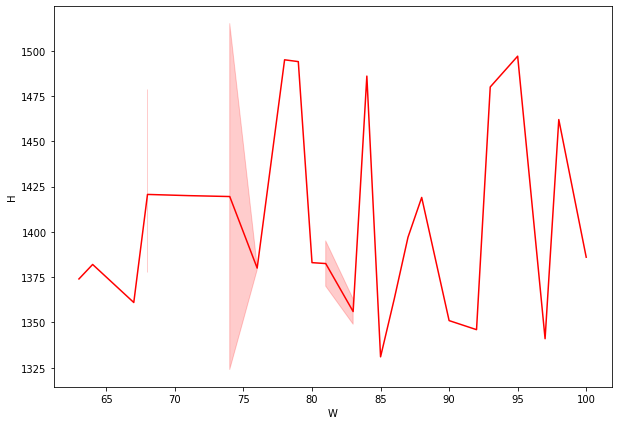

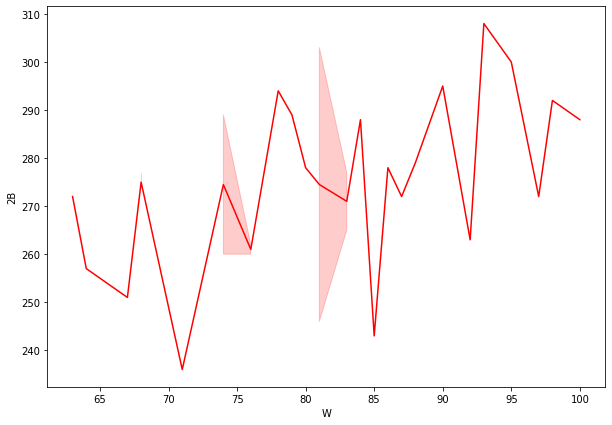

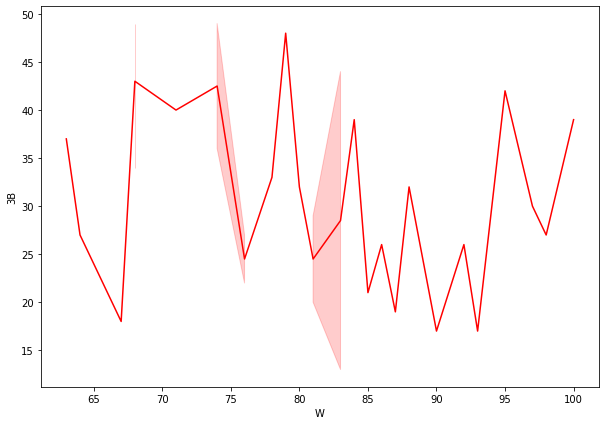

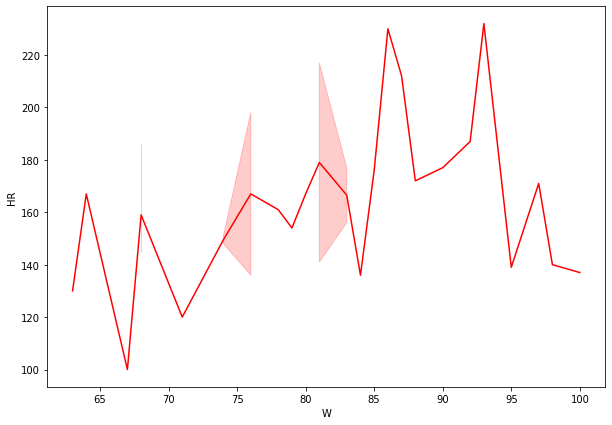

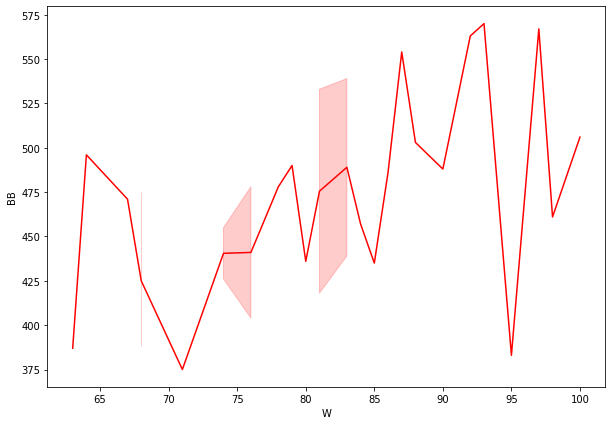

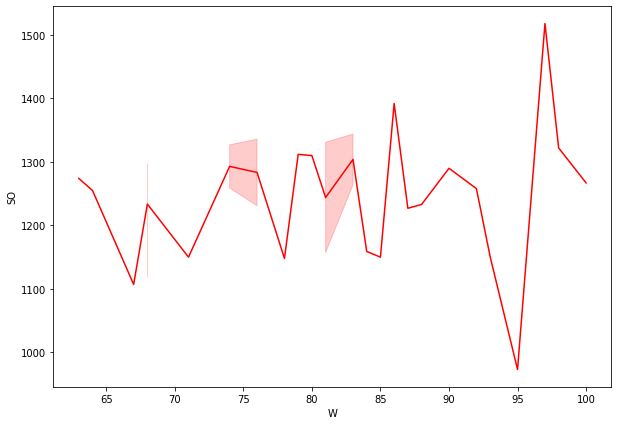

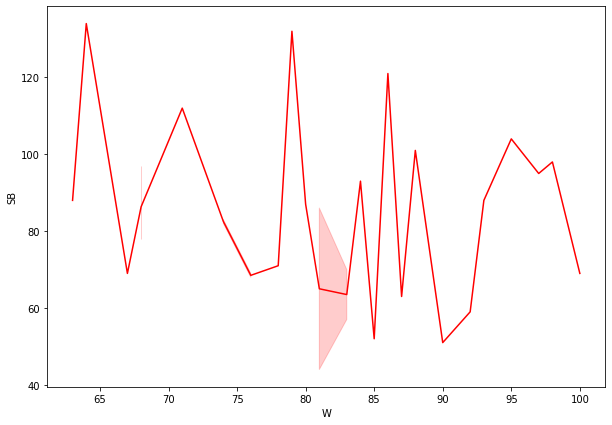

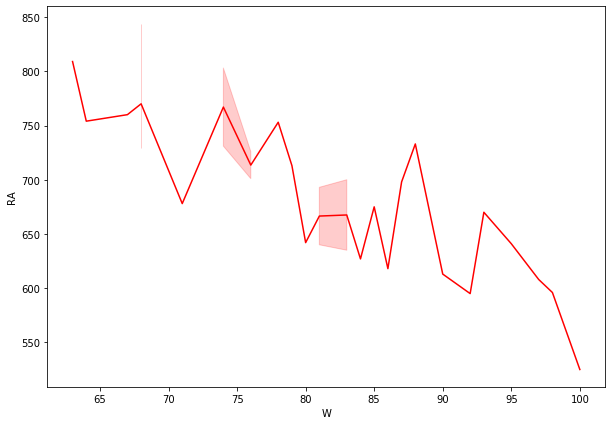

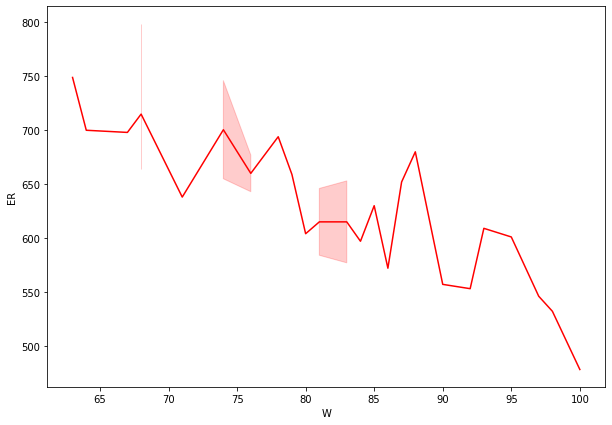

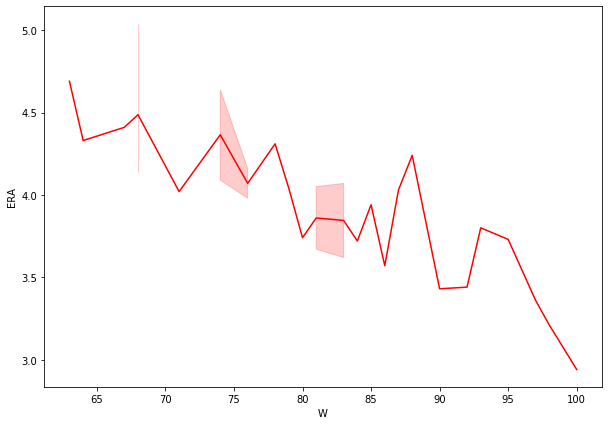

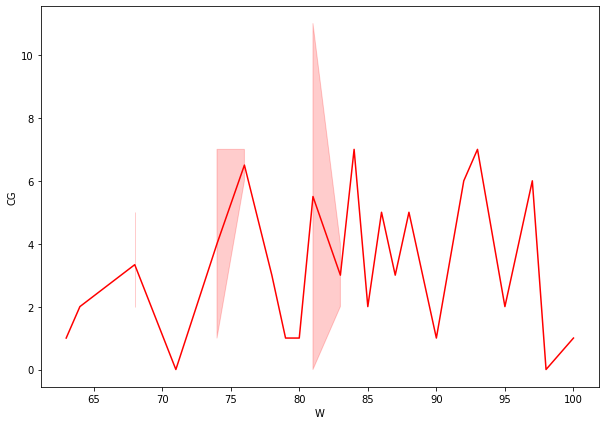

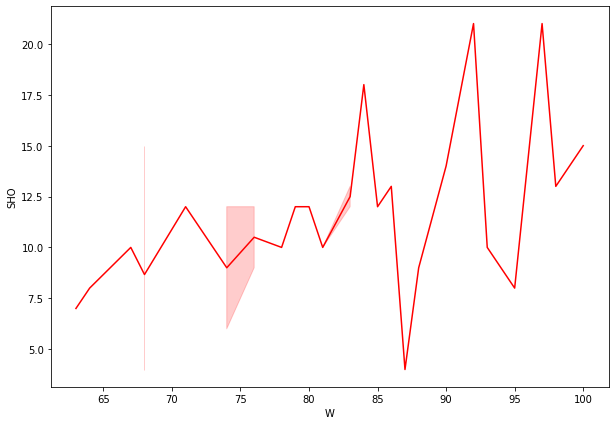

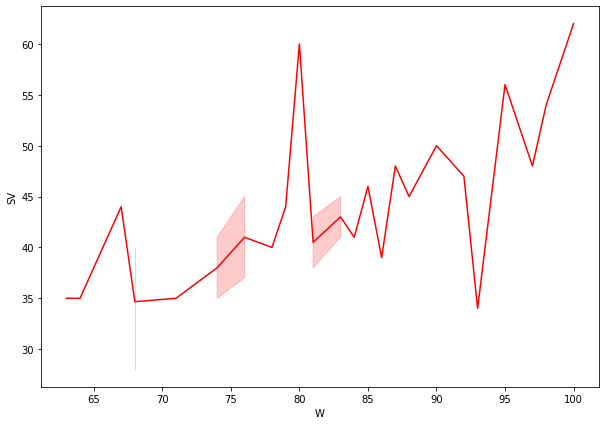

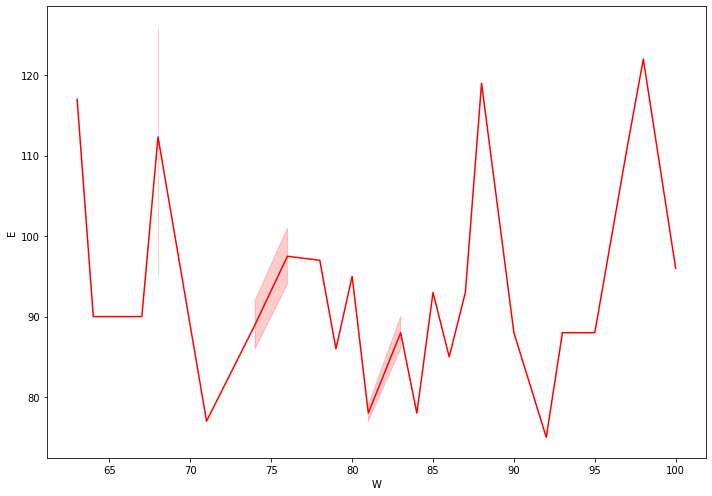

In [14]:
index=0
labels = df['W']
features = df.drop('W', axis=1)

for col in features.items():
    plt.figure(figsize=(10,7))
    sns.lineplot(x=labels, y=col[index], data=df, color="red")
plt.tight_layout()
plt.show()

The observation made with the bar plot can be verfifed with the line plot

Normal Distribution Curve

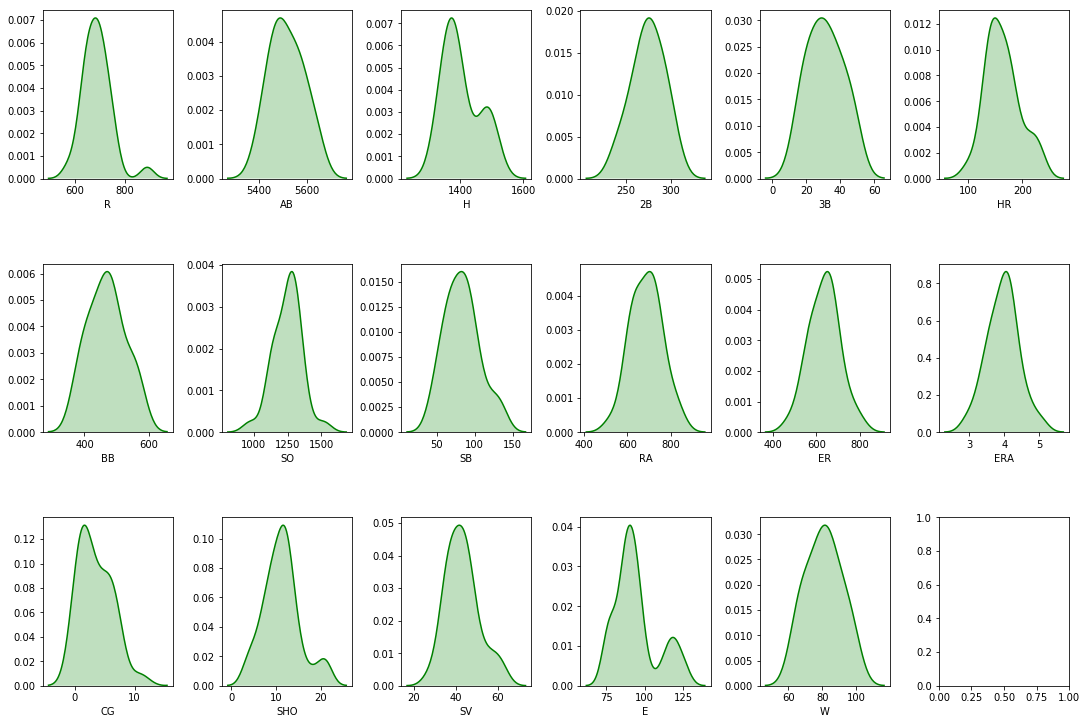

In [15]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


As we can observe that majority of the graphs are bell shaped and are normally distributed. Skewness is present in columns like R,H,SHO,E while other are normally distributed

In [63]:
df.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
W      0.119013
dtype: float64

PairPlot

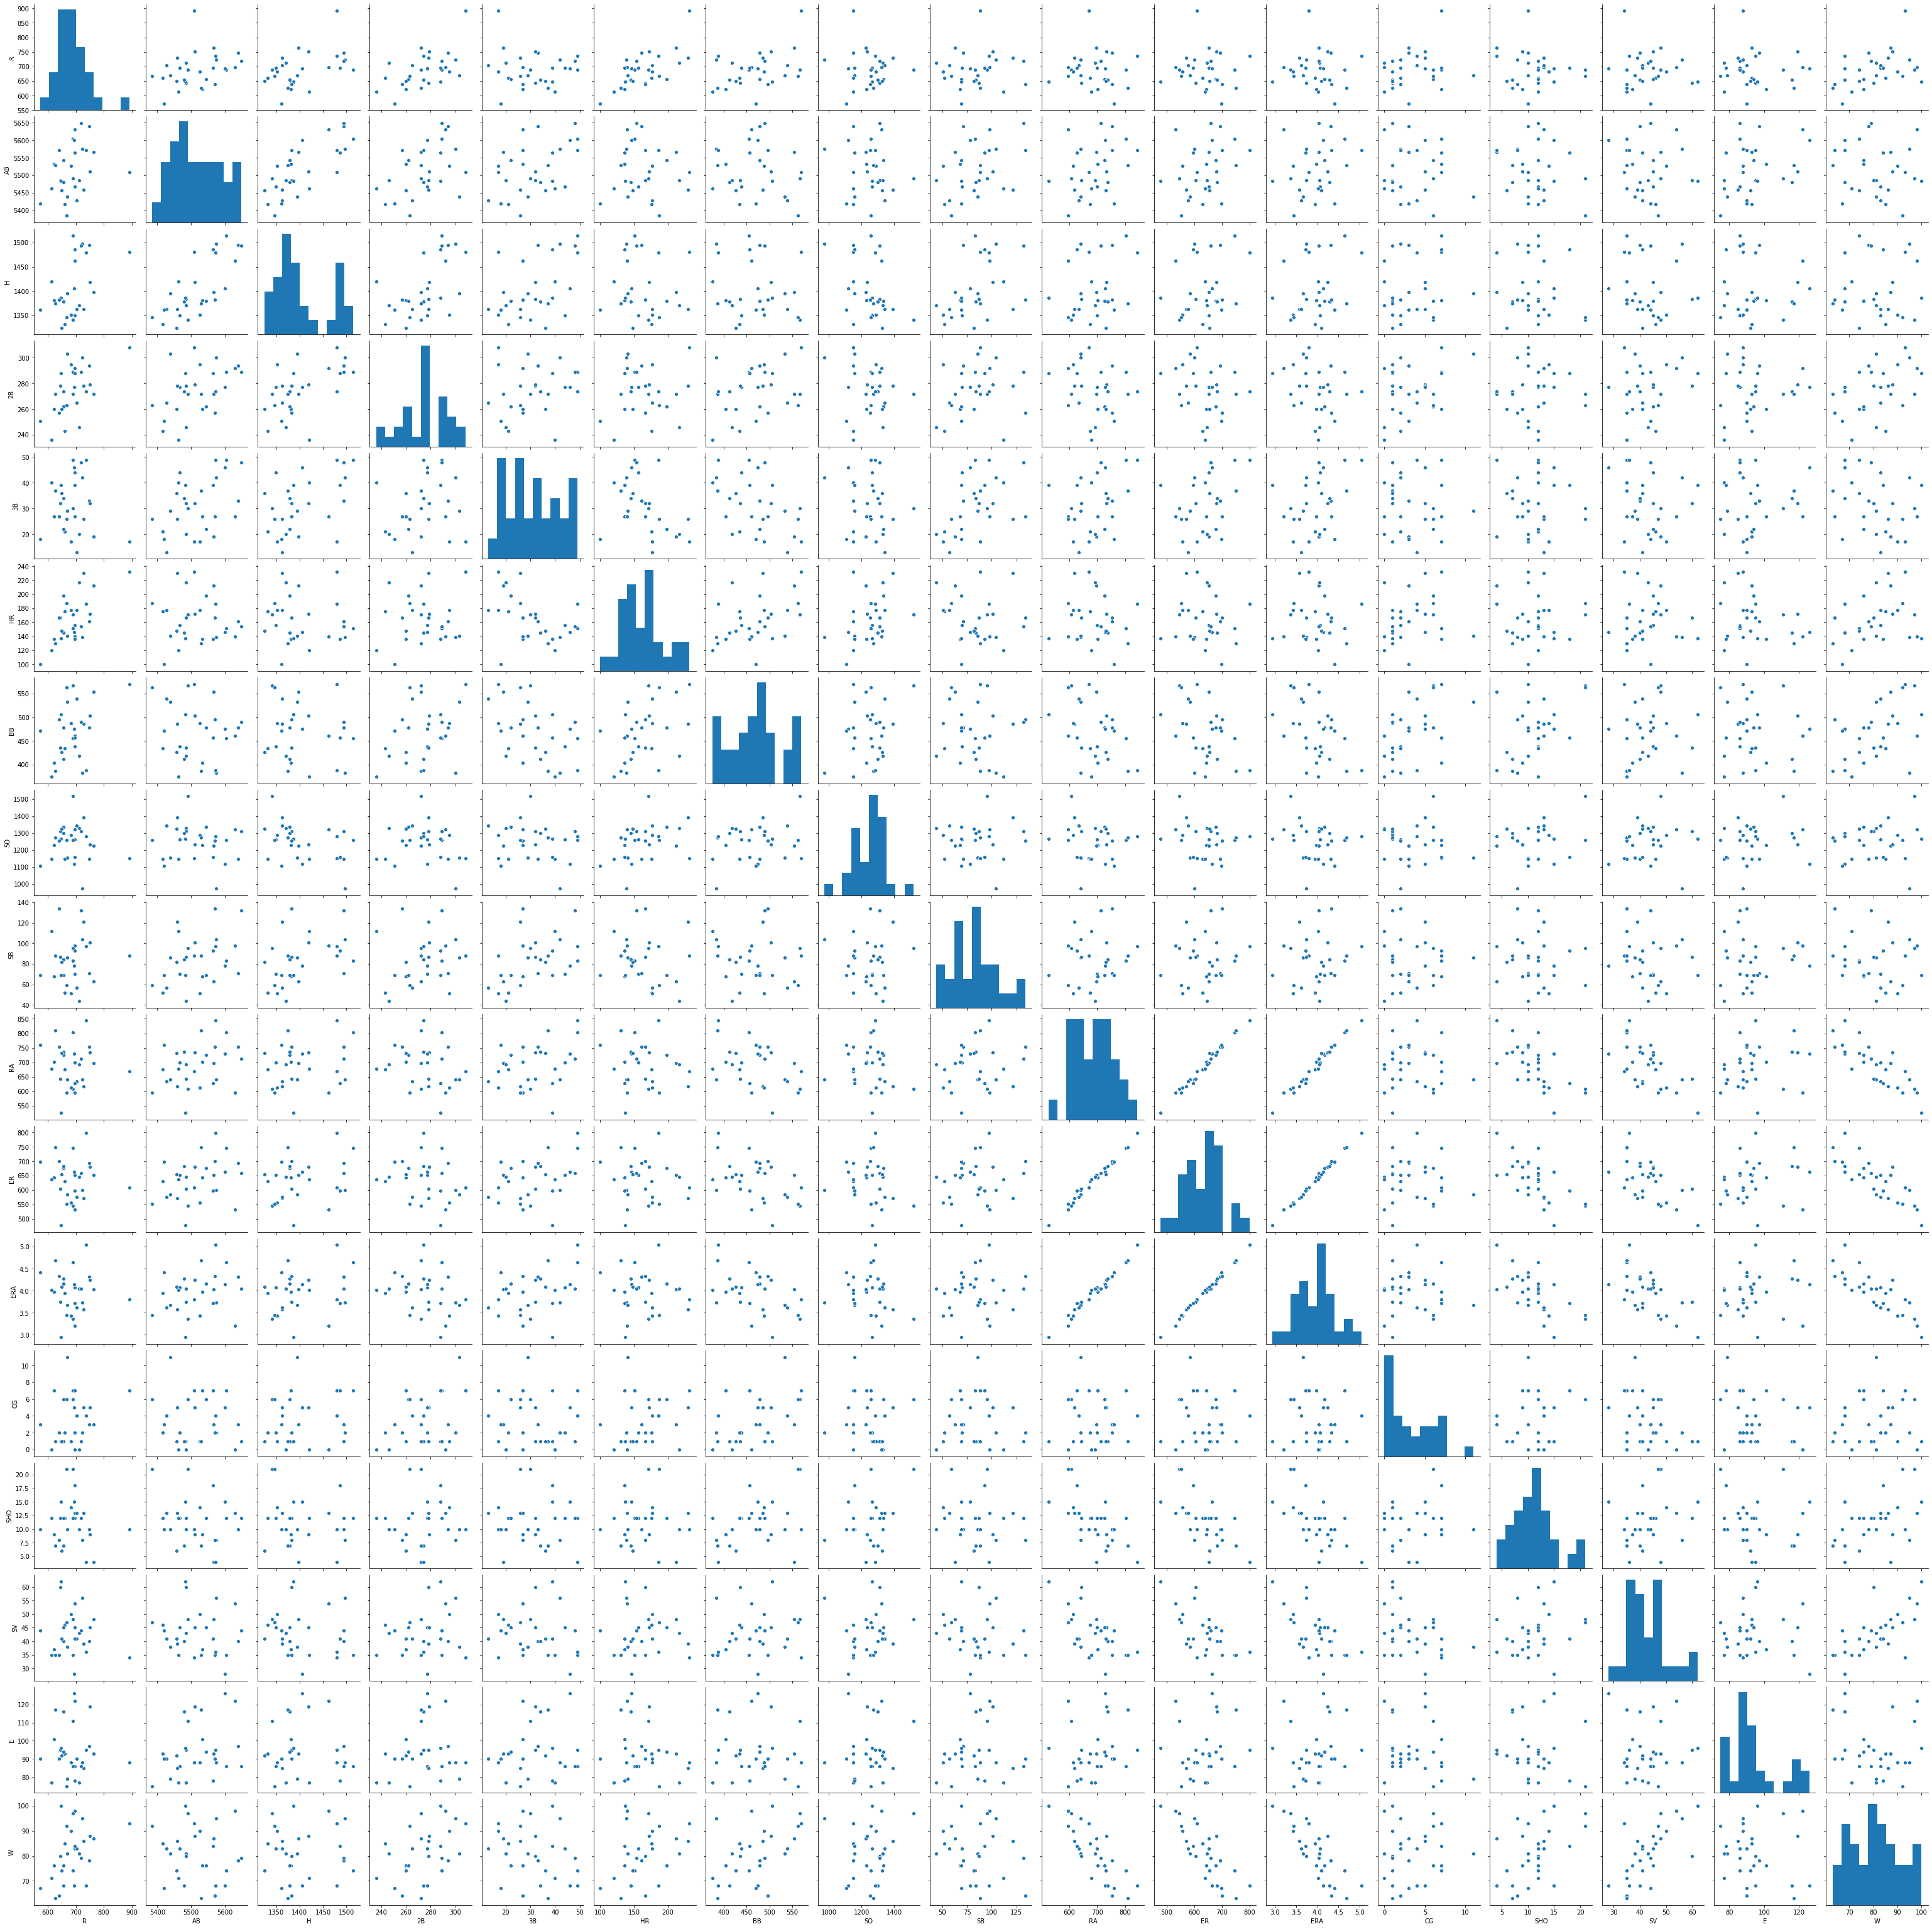

In [16]:
sns.pairplot(df)

# Correlation with Target column

In [17]:
df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

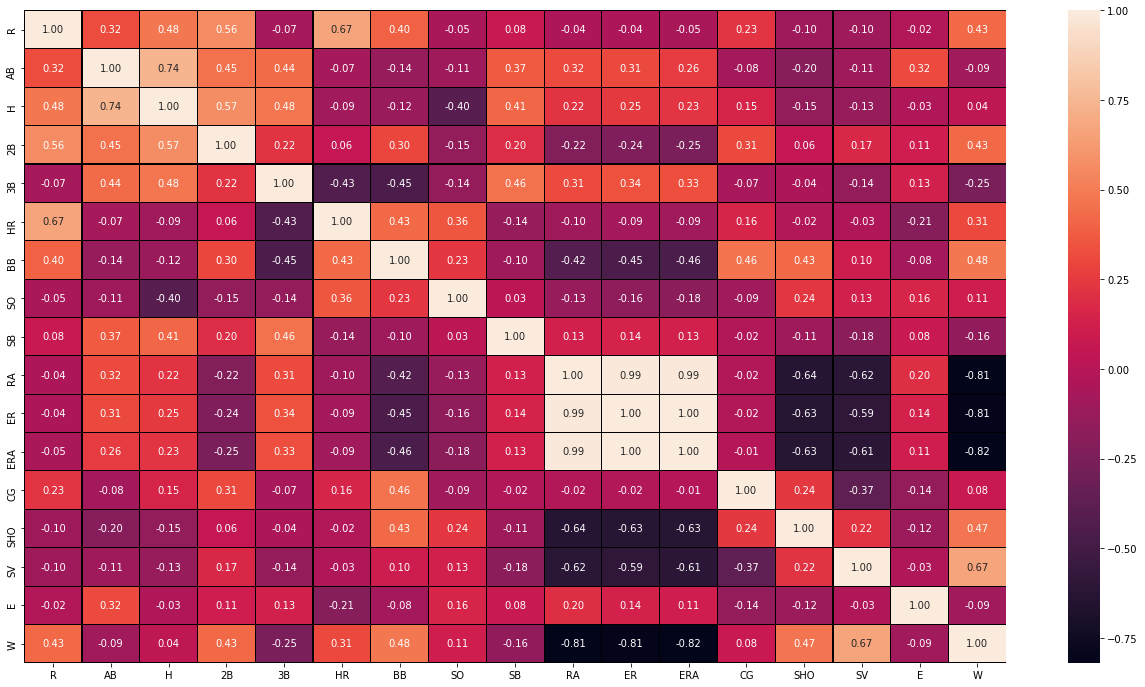

In [18]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.2f')

It is easier for us to indentify the correlation between variables with the help of a heat map. A zero correlation indicates there is no relationship between variables.
The wins column is positively correlated with saves(SV) and negatively correlated with EarnRunAverage(ERA).
Wins is least correlated with hits(H) column with a correlation 0.04

We can see some highly positive and negatitve correlation values which can pose a threat of multicollinearity. If we assume the multicollinearity coefficient as r in the range +1,-1 then a value of 1 is said to
be perfectly multicollinear. Here we can see W vs ERA with a neagtive correlation of -0.82 which is close to one. Similarly we have W vs ER as -0.1 and W vs RA as -8.82.
AB vs H has a correlation of 0.74 which is close to one. We may have drop them in order to imrove the accuracy of our model.

Later on we can use Ridge Regression to tackle multicollinearity

# Bar Plot for all columns along with The Target

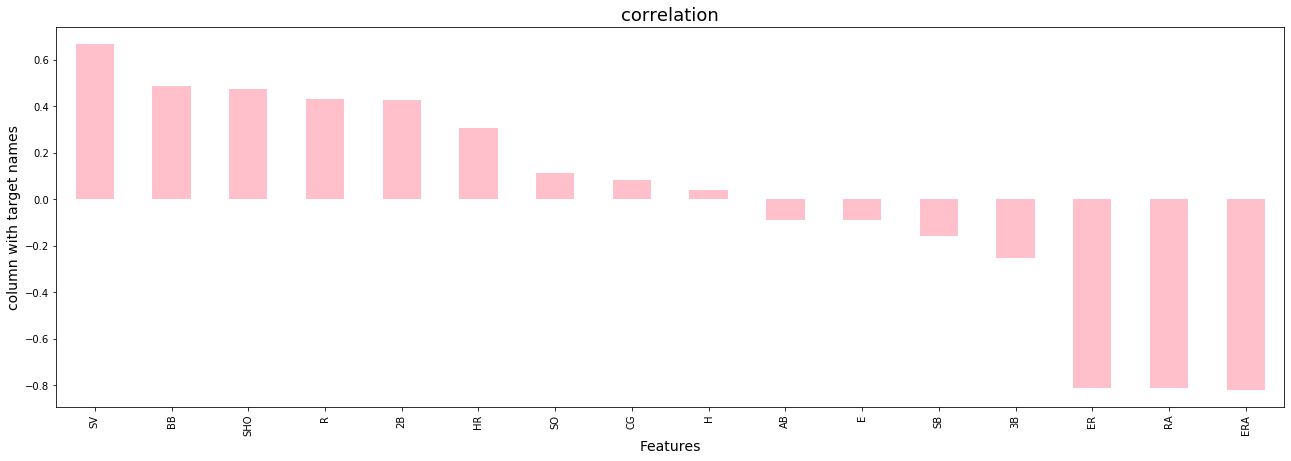

In [19]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='pink')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

From the graph we can observe that columns SV,BB,SHO,R,2B,HR,SO,CG are positively correlated With our target variable and are in desceding order from left to right, where as the columns 
AB,E,SB,3B,ER,RA,ERA are negatively correlated with our target wins and are in ascending order from left to right.

Now Let us cehck the skewness

In [20]:
df.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

the skewness range taken is(-0.5,0.5)

the column R and E has a lot of skewness, where as the other columns like H,ER,ERA,CG,,SV have little skewness.

# Dropping a Column

The ER and ERA column can pose a problem of multicollinearity and both of them give us the same information. Therefore we will drop the ERA column

In [21]:
df=df.drop(['ERA','ER'],axis=1)

# Checking For Outliers

In [22]:
df.dtypes

R      int64
AB     int64
H      int64
2B     int64
3B     int64
HR     int64
BB     int64
SO     int64
SB     int64
RA     int64
CG     int64
SHO    int64
SV     int64
E      int64
W      int64
dtype: object

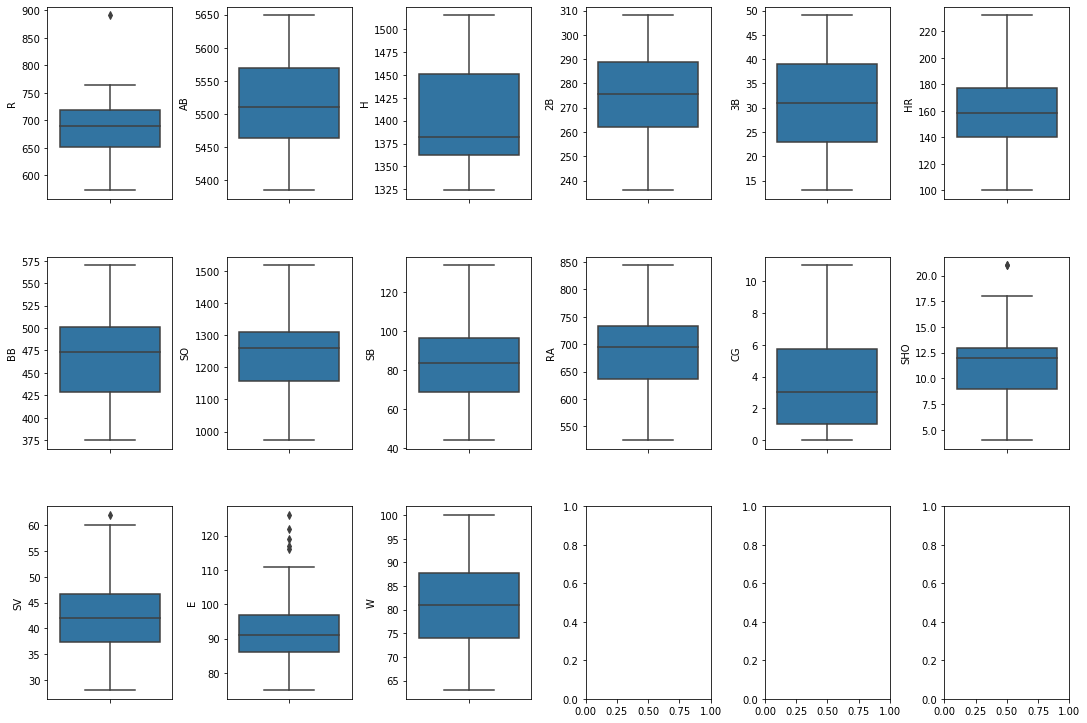

In [23]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.8, h_pad=5.0)
plt.show()

 Not many outliers are present . The outliers are present in columns R,ERA,SHO,SV and a lot of outliers in E

# Removing Outliers

In [24]:
df.shape

(30, 15)

applying z score to remove outliers

In [25]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([0], dtype=int64))

the value of 2 suits us. If threshold is set to 3 we do not get any values of outliers and if it is set to 1 we get alot of values
and as we observed from the boxplot that not many outliers are present the threshold of 2 suits us.

In [26]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z



,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86,74
6,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97,78
10,751,5511,1419,279,32,172,503,1233,101,733,5,9,45,119,88


In [27]:
df=df_new_z.copy()

Now let us calculate the percentage loss of data to check whether or not too much data is lost

In [28]:
Data_loss=((30-29)/30)*100
Data_loss

3.3333333333333335

Since the percentage data loss is less we can proceed with this data frame

# Separating the columns into features and targets:

In [29]:
x=df.drop('W',axis=1)
y=df['W']
print(x.shape)
print(y.shape)

(29, 14)
(29,)


# Transforming Data to remove Skewness(pre processing pipeline)

# Principal Component Analysis(PCA)

In [30]:
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
x

array([[-2.85617344e+02, -7.18304093e+01, -1.05028475e+02,
        -3.68787900e+01,  5.89759385e+01,  2.09441388e+00,
         1.86666680e+01, -6.57161731e+00,  7.20205112e+00,
        -4.65750462e+00, -5.10244702e+00,  5.24382978e+00,
        -1.26154782e+00,  1.25777711e+00],
       [ 3.12843933e+01, -3.62712656e+01,  4.29028790e+01,
         8.78933375e+00,  3.38586591e+01,  9.73928904e+00,
         1.80824549e+00, -2.63086674e+01,  1.29062995e+01,
         2.08335927e+01,  2.75347788e+00,  5.77211128e+00,
        -2.12062087e+00,  6.04549925e-01],
       [-2.55161279e+01, -1.21132482e+02, -5.65217154e+01,
         4.40570891e+01, -2.89705373e+01, -3.97605724e+01,
         2.74068048e+00, -1.24053269e+01,  2.28863138e+01,
        -2.42649792e+00, -1.01865544e+00, -9.81225922e+00,
         3.48734880e+00,  1.65820665e+00],
       [-3.38325431e+01, -2.14228544e+01,  5.40034159e+01,
        -5.89827067e+01, -1.63191984e+01,  3.41056808e+01,
        -1.20269828e+01,  6.50246738e+00, -3.

# Power Transform

we will use yeo-johnson method as box cox is used for positive values. Power transform will help in reducing outliers

In [31]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.64407975e+00, -8.23463682e-01, -1.53374997e+00,
        -7.96064876e-01,  1.52541049e+00,  1.25505843e-01,
         9.92309125e-01, -3.64606813e-01,  6.90279663e-01,
        -4.91014687e-01, -8.20918063e-01,  9.56221742e-01,
        -5.18078361e-01,  9.05470226e-01],
       [ 3.03974692e-01, -4.24464758e-01,  6.29523475e-01,
         1.65628552e-01,  9.16322046e-01,  3.90407693e-01,
         2.43995172e-01, -1.54527733e+00,  1.21225082e+00,
         2.12418752e+00,  5.44968883e-01,  1.05687628e+00,
        -1.07793127e+00,  5.79438675e-01],
       [-1.98742537e-01, -1.37501965e+00, -7.87358119e-01,
         9.51147355e-01, -7.84320544e-01, -1.48684831e+00,
         2.89611501e-01, -7.11627918e-01,  2.11812975e+00,
        -1.90686629e-01, -2.57287560e-02, -1.74240363e+00,
         1.46547762e+00,  1.08492534e+00],
       [-2.75596387e-01, -2.57334524e-01,  7.73721858e-01,
        -1.25150760e+00, -4.06294879e-01,  1.21124348e+00,
        -6.13228598e-01,  3.91608978e-01, -3.

# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.64407975e+00, -8.23463682e-01, -1.53374997e+00,
        -7.96064876e-01,  1.52541049e+00,  1.25505843e-01,
         9.92309125e-01, -3.64606813e-01,  6.90279663e-01,
        -4.91014687e-01, -8.20918063e-01,  9.56221742e-01,
        -5.18078361e-01,  9.05470226e-01],
       [ 3.03974692e-01, -4.24464758e-01,  6.29523475e-01,
         1.65628552e-01,  9.16322046e-01,  3.90407693e-01,
         2.43995172e-01, -1.54527733e+00,  1.21225082e+00,
         2.12418752e+00,  5.44968883e-01,  1.05687628e+00,
        -1.07793127e+00,  5.79438675e-01],
       [-1.98742537e-01, -1.37501965e+00, -7.87358119e-01,
         9.51147355e-01, -7.84320544e-01, -1.48684831e+00,
         2.89611501e-01, -7.11627918e-01,  2.11812975e+00,
        -1.90686629e-01, -2.57287560e-02, -1.74240363e+00,
         1.46547762e+00,  1.08492534e+00],
       [-2.75596387e-01, -2.57334524e-01,  7.73721858e-01,
        -1.25150760e+00, -4.06294879e-01,  1.21124348e+00,
        -6.13228598e-01,  3.91608978e-01, -3.

# Since the Target has continuous values we will be doing regression

# Linear Regression

Here we will try to find the best random state

In [35]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f" At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f" At random state {i}, the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

 At random state 0, the training accuracy is :- 0.982572960815423
 At random state 0, the testing accuracy is :- 0.0453852061458323


 At random state 1, the training accuracy is :- 0.9618303484379894
 At random state 1, the testing accuracy is :- 0.6788059420163863


 At random state 2, the training accuracy is :- 0.9480716572266334
 At random state 2, the testing accuracy is :- -0.44765840607208407


 At random state 3, the training accuracy is :- 0.9237395650137102
 At random state 3, the testing accuracy is :- 0.7779913295478459


 At random state 4, the training accuracy is :- 0.9452466840798558
 At random state 4, the testing accuracy is :- 0.6760228883074136


 At random state 5, the training accuracy is :- 0.9553228119807757
 At random state 5, the testing accuracy is :- 0.1427083395665808


 At random state 6, the training accuracy is :- 0.9174073401701811
 At random state 6, the testing accuracy is :- 0.9159085466827563


 At random state 7, the training accuracy is :- 0.9398

 At random state 99, the training accuracy is :- 0.9278463048107364
 At random state 99, the testing accuracy is :- 0.898179645275316




We get the best training and testing accuracy at random state 15 where training accuracy is 91.09%

and testing accuracy is 92.69%

# DecisionTree Regressor

In [36]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f" At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f" At random state {i}, the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

 At random state 0, the training accuracy is :- 0.8364611082395663
 At random state 0, the testing accuracy is :- -2.204363606469778


 At random state 1, the training accuracy is :- 0.6486252225479566
 At random state 1, the testing accuracy is :- 0.3080747812251393


 At random state 2, the training accuracy is :- 0.7753727743716504
 At random state 2, the testing accuracy is :- -1.9744661924135896


 At random state 3, the training accuracy is :- 0.7132414004108572
 At random state 3, the testing accuracy is :- 0.4015274179620032


 At random state 4, the training accuracy is :- 0.7330557462336067
 At random state 4, the testing accuracy is :- 0.35667189952904244


 At random state 5, the training accuracy is :- 0.8203668537626458
 At random state 5, the testing accuracy is :- -0.7572050290135395


 At random state 6, the training accuracy is :- 0.6857753055637504
 At random state 6, the testing accuracy is :- -0.3441124537116478


 At random state 7, the training accuracy is :- 0.8

 At random state 84, the testing accuracy is :- -1.3731212975167812


 At random state 85, the training accuracy is :- 0.8271446120608131
 At random state 85, the testing accuracy is :- 0.21581546521169281


 At random state 86, the training accuracy is :- 0.8264102317838392
 At random state 86, the testing accuracy is :- -1.56799789410349


 At random state 87, the training accuracy is :- 0.7676471601281301
 At random state 87, the testing accuracy is :- -0.2461765247834895


 At random state 88, the training accuracy is :- 0.8142528682457439
 At random state 88, the testing accuracy is :- -2.2061906052743683


 At random state 89, the training accuracy is :- 0.7812516969918061
 At random state 89, the testing accuracy is :- 0.10979065892067241


 At random state 90, the training accuracy is :- 0.8234257083971309
 At random state 90, the testing accuracy is :- -2.2308697461506437


 At random state 91, the training accuracy is :- 0.7931200481119376
 At random state 91, the testing acc

# RandomForestRegressor

In [37]:
parameters={'criterion':['squared_error','absolute_error'],'max_features':["auto","sqrt","log2"]}
rfr=RandomForestRegressor()
gcv=GridSearchCV(rfr,parameters)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'criterion': 'absolute_error', 'max_features': 'sqrt'}


In [38]:
rfr=RandomForestRegressor(criterion='absolute_error',max_features='auto')
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_test)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rfr,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score',rfc*100)

R2 Score -19.649818719540015
Cross Val Score -80.24736968380199


# SupportVector Regression

In [39]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    print(f" At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f" At random state {i}, the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

 At random state 0, the training accuracy is :- 0.14472085324295347
 At random state 0, the testing accuracy is :- -0.013616935203172309


 At random state 1, the training accuracy is :- 0.18033606303390903
 At random state 1, the testing accuracy is :- -0.00044037524648565807


 At random state 2, the training accuracy is :- 0.17262138395488036
 At random state 2, the testing accuracy is :- -3.80733152901902


 At random state 3, the training accuracy is :- 0.16353757124378687
 At random state 3, the testing accuracy is :- 0.0422144823850743


 At random state 4, the training accuracy is :- 0.1735013084085193
 At random state 4, the testing accuracy is :- -0.1426211274440803


 At random state 5, the training accuracy is :- 0.16541703336842584
 At random state 5, the testing accuracy is :- 0.04619443658696365


 At random state 6, the training accuracy is :- 0.17821914160583674
 At random state 6, the testing accuracy is :- 0.008564022002304883


 At random state 7, the training accur

 At random state 78, the training accuracy is :- 0.16641679423062394
 At random state 78, the testing accuracy is :- -0.31078866133623184


 At random state 79, the training accuracy is :- 0.1791195000879069
 At random state 79, the testing accuracy is :- -0.020457457620320252


 At random state 80, the training accuracy is :- 0.17815188199309173
 At random state 80, the testing accuracy is :- 0.01412287762451958


 At random state 81, the training accuracy is :- 0.15241153655632156
 At random state 81, the testing accuracy is :- -0.07968991208265064


 At random state 82, the training accuracy is :- 0.1547825637141076
 At random state 82, the testing accuracy is :- -0.17009479544310357


 At random state 83, the training accuracy is :- 0.1791932457091412
 At random state 83, the testing accuracy is :- 0.011976332938049894


 At random state 84, the training accuracy is :- 0.1694617526916231
 At random state 84, the testing accuracy is :- -0.047564131474552296


 At random state 85, th

# Extreme Gradient boosting

In [40]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    xgbr.fit(x_train,y_train)
    pred_train=xgbr.predict(x_train)
    pred_test=xgbr.predict(x_test)
    print(f" At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f" At random state {i}, the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

 At random state 0, the training accuracy is :- 0.9999999981070178
 At random state 0, the testing accuracy is :- -0.4296969555816814


 At random state 1, the training accuracy is :- 0.9999999972461028
 At random state 1, the testing accuracy is :- -0.003578339764992222


 At random state 2, the training accuracy is :- 0.999999997968959
 At random state 2, the testing accuracy is :- -0.961109541159036


 At random state 3, the training accuracy is :- 0.9999999975212833
 At random state 3, the testing accuracy is :- 0.09891310597817715


 At random state 4, the training accuracy is :- 0.9999999984349102
 At random state 4, the testing accuracy is :- 0.2957380257897062


 At random state 5, the training accuracy is :- 0.9999999984793486
 At random state 5, the testing accuracy is :- 0.6135531412946003


 At random state 6, the training accuracy is :- 0.9999999977545175
 At random state 6, the testing accuracy is :- 0.3737608684783573


 At random state 7, the training accuracy is :- 0.9

 At random state 60, the training accuracy is :- 0.9999999983626702
 At random state 60, the testing accuracy is :- -0.2391206381797908


 At random state 61, the training accuracy is :- 0.9999999985384702
 At random state 61, the testing accuracy is :- 0.5589519971453621


 At random state 62, the training accuracy is :- 0.9999999983279154
 At random state 62, the testing accuracy is :- -1.24574902423862


 At random state 63, the training accuracy is :- 0.9999999985517721
 At random state 63, the testing accuracy is :- -0.029054434335284984


 At random state 64, the training accuracy is :- 0.9999999974260194
 At random state 64, the testing accuracy is :- -0.036731536763224604


 At random state 65, the training accuracy is :- 0.999999997584259
 At random state 65, the testing accuracy is :- 0.39633821035649874


 At random state 66, the training accuracy is :- 0.9999999981405162
 At random state 66, the testing accuracy is :- -0.2086531176490063


 At random state 67, the training 

# choosing our best model

# Since out of all the regression techniques, Linear regression is the most suitable as the training and test accuracy is almost the same and not as low as other regression techniques

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=15)

In [42]:
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
pred_test=lr.predict(x_test)

In [44]:
print(r2_score(y_test,pred_test)*100)

92.69983669312137


# Cross Validation of the model:

We want check if the value is overfitting or if if there is selection bias or not with cross validation model

In [45]:
from sklearn.model_selection import KFold
train_accuracy=r2_score(y_train,pred_train)*100
test_accuracy=r2_score(y_test,pred_test)*100

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=KFold(n_splits=j,shuffle=True))
    cv_mean=cv_score.mean()
    print("Ath cross fold",j,"the cv score is",cv_mean,"and accuracy score for training is",train_accuracy,"and accuracy score for testing is",test_accuracy)

Ath cross fold 2 the cv score is -4.692261971431438 and accuracy score for training is -71.66853824125685 and accuracy score for testing is 92.69983669312137
Ath cross fold 3 the cv score is 0.28357636195757496 and accuracy score for training is -71.66853824125685 and accuracy score for testing is 92.69983669312137
Ath cross fold 4 the cv score is 0.43377770979486097 and accuracy score for training is -71.66853824125685 and accuracy score for testing is 92.69983669312137
Ath cross fold 5 the cv score is 0.5960103034061538 and accuracy score for training is -71.66853824125685 and accuracy score for testing is 92.69983669312137
Ath cross fold 6 the cv score is 0.16832895679562007 and accuracy score for training is -71.66853824125685 and accuracy score for testing is 92.69983669312137
Ath cross fold 7 the cv score is 0.49224535527851543 and accuracy score for training is -71.66853824125685 and accuracy score for testing is 92.69983669312137
Ath cross fold 8 the cv score is 0.2616307099450

# HYPERPARAMETER TUNING USING GSCV

In [46]:
fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

The parameters have been used after referring from sklearn 

In [47]:
gcv = GridSearchCV(LinearRegression(), fmod_param, cv=5)

In [48]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [49]:
gcv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': True,
 'positive': False}

In [50]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Regressor= Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: -14.7189315986483


The above score does not give us a good accuracy, therefore lets try it on ridge 

# Regularization(Ridge)

In [51]:
from sklearn.linear_model import Ridge

parameters={'alpha':[.0001,.001,.01,.1,1,10,100],'random_state':list(range(0,100))}
r=Ridge()
gcv=GridSearchCV(r,parameters)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'alpha': 10, 'random_state': 0}


In [52]:
r=Ridge(alpha=10,random_state=0)
r.fit(x_train,y_train)
r_score=r.score(x_train,y_train)
pred_r_train=r.predict(x_train)
pred_r_test=r.predict(x_test)
print('Ridge score is:-',r_score)

Ridge score is:- 0.8133088819901652


We can observe that are accuracy is good and realistic

# Plotting the linear regression graph

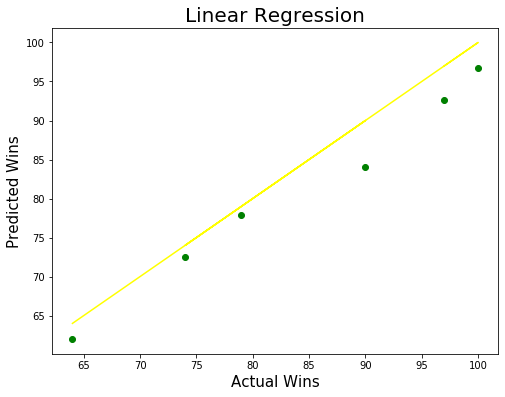

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='green')
plt.plot(y_test,y_test,color='yellow')
plt.xlabel('Actual Wins',fontsize=15)
plt.ylabel('Predicted Wins',fontsize=15)
plt.title('Linear Regression',fontsize=20)
plt.show()

we  can see that no ouliers are present and the points are very close to line of best fit but do not lie on them. The accuracy may have a chance for improvement

# Model Saving

In [54]:
filename='Baseball_E1.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [64]:
loaded_model=pickle.load(open('Baseball_E1.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100,'%')

92.69983669312137 %


In [58]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predcited','Original'])

In [59]:
conclusion

,0,1,2,3,4,5
Predcited,92.630389,96.760557,77.85741,72.506919,84.091618,62.012958
Original,92.630389,96.760557,77.85741,72.506919,84.091618,62.012958


In [ ]:
We have been able to achieve a good accuracy